In [1]:
# LOADING HUGGIN FACE TWEET-EMOTION DATA 
from datasets import load_dataset

dataset = load_dataset("tweet_eval", "emotion")

Using the latest cached version of the module from C:\Users\HP\.cache\huggingface\modules\datasets_modules\datasets\tweet_eval\12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343 (last modified on Wed Dec 28 17:46:15 2022) since it couldn't be found locally at tweet_eval., or remotely on the Hugging Face Hub.
Found cached dataset tweet_eval (C:/Users/HP/.cache/huggingface/datasets/tweet_eval/emotion/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


  0%|          | 0/3 [00:00<?, ?it/s]

In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 3257
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1421
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 374
    })
})

In [3]:
keys = dataset.keys()
# print(keys)

dataset['train'].column_names

['text', 'label']

In [286]:
dataset['train']['text']

["“Worry is a down payment on a problem you may never have'. \xa0Joyce Meyer.  #motivation #leadership #worry",
 "My roommate: it's okay that we can't spell because we have autocorrect. #terrible #firstworldprobs",
 "No but that's so cute. Atsu was probably shy about photos before but cherry helped her out uwu",
 "Rooneys fucking untouchable isn't he? Been fucking dreadful again, depay has looked decent(ish)tonight",
 "it's pretty depressing when u hit pan on ur favourite highlighter",
 '@user but your pussy was weak from what I heard so stfu up to me bitch . You got to threaten him that your pregnant .',
 'Making that yearly transition from excited and hopeful college returner to sick and exhausted pessimist. #college',
 'Tiller and breezy should do a collab album. Rapping and singing prolly be fire',
 '@user broadband is shocking regretting signing up now #angry #shouldofgonewithvirgin',
 '@user Look at those teef! #growl',
 '@user @user USA was embarrassing to watch. When was the la

In [287]:
id = dataset['train'].flatten().features['label'].names
print(id)

['anger', 'joy', 'optimism', 'sadness']


In [288]:
dataset['train'].flatten().features['label']

ClassLabel(names=['anger', 'joy', 'optimism', 'sadness'], id=None)

In [289]:
train_data = dataset['train']
test_data = dataset['test']
validation_data = dataset['validation']

In [290]:
# CONVERTING TRAINING DATA TO PANDAS FORMAT.. 
train_df = train_data.to_pandas()
train_df.head()

,text,label
0,“Worry is a down payment on a problem you may ...,2
1,My roommate: it's okay that we can't spell bec...,0
2,No but that's so cute. Atsu was probably shy a...,1
3,Rooneys fucking untouchable isn't he? Been fuc...,0
4,it's pretty depressing when u hit pan on ur fa...,3


In [291]:
train_df.label.unique()

array([2, 0, 1, 3], dtype=int64)

<AxesSubplot: >

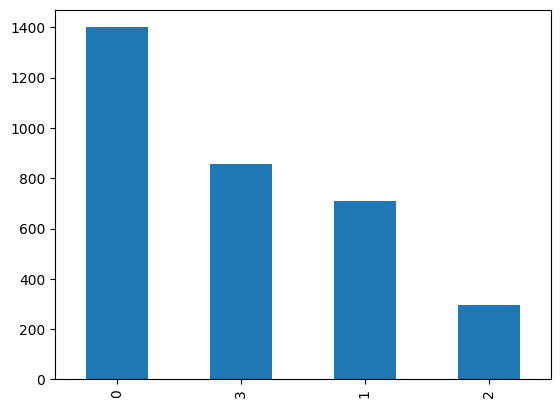

In [292]:
train_df['label'].value_counts().plot(kind='bar')

In [293]:
sample_text = train_data[:5]['text'].values
text = [text for text in sample_text]
text

AttributeError: 'list' object has no attribute 'values'

In [294]:
from transformers import AutoTokenizer
# checkpoint = 'distilbert-base-uncased-finetuned-sst-2-english'
checkpoint = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint )

In [295]:
# tokens = [tokenizer.tokenize(sentence) for sentence in text]
# ids = [tokenizer.convert_tokens_to_ids(token) for token in tokens]
# print(ids)
inputs =  tokenizer(text, padding=True, truncation=True, return_tensors='tf')

In [296]:
inputs

{'input_ids': <tf.Tensor: shape=(5, 30), dtype=int32, numpy=
array([[  101,  1523,  4737,  2003,  1037,  2091,  7909,  2006,  1037,
         3291,  2017,  2089,  2196,  2031,  1005,  1012, 11830, 11527,
         1012,  1001, 14354,  1001,  4105,  1001,  4737,   102,     0,
            0,     0,     0],
       [  101,  2026, 18328,  1024,  2009,  1005,  1055,  3100,  2008,
         2057,  2064,  1005,  1056,  6297,  2138,  2057,  2031,  8285,
        27108,  2890,  6593,  1012,  1001,  6659,  1001,  2034, 11108,
        21572,  5910,   102],
       [  101,  2053,  2021,  2008,  1005,  1055,  2061, 10140,  1012,
         2012,  6342,  2001,  2763, 11004,  2055,  7760,  2077,  2021,
         9115,  3271,  2014,  2041,  1057, 16050,   102,     0,     0,
            0,     0,     0],
       [  101, 24246,  2015,  8239, 19662, 10875,  3085,  3475,  1005,
         1056,  2002,  1029,  2042,  8239, 21794,  2153,  1010,  2139,
         4502,  2100,  2038,  2246, 11519,  1006,  2003,  2232,  100

In [297]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [298]:
inputs['input_ids'][0]

<tf.Tensor: shape=(30,), dtype=int32, numpy=
array([  101,  1523,  4737,  2003,  1037,  2091,  7909,  2006,  1037,
        3291,  2017,  2089,  2196,  2031,  1005,  1012, 11830, 11527,
        1012,  1001, 14354,  1001,  4105,  1001,  4737,   102,     0,
           0,     0,     0])>

In [299]:
dataset['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 3257
})

In [301]:
# text_data = [data for data in dataset['train']['text'].values]

In [ ]:
dataset['train']

In [302]:
def tokenize_dataset(data): 
    return tokenizer(
        data['text'], padding= True , truncation=True, max_length=128
    )

dataset.reset_format()
proprocessed_data = dataset.map(lambda x : tokenize_dataset(x))

  0%|          | 0/3257 [00:00<?, ?ex/s]

  0%|          | 0/1421 [00:00<?, ?ex/s]

  0%|          | 0/374 [00:00<?, ?ex/s]

In [ ]:
token_dataset

In [250]:
token_dataset['train']

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 3257
})

In [264]:
from transformers import TFAutoModelForSequenceClassification, TFAutoModel

In [256]:
# BRINGIN IN MODEL
# model = TFAutoModel.from_pretrained(checkpoint, num_labels=4)
# print(type(model))

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


<class 'transformers.models.bert.modeling_tf_bert.TFBertModel'>


In [387]:
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=4)
print(type(model))

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\HP/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_e

<class 'transformers.models.bert.modeling_tf_bert.TFBertForSequenceClassification'>


In [381]:
from transformers import AutoModelForSequenceClassification, TFAutoModel

In [382]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=4)


loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\HP/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_e

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/pytorch_model.bin in cache at C:\Users\HP/.cache\huggingface\transformers\a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f
creating metadata file for C:\Users\HP/.cache\huggingface\transformers\a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f
loading weights file https://huggingface.co/bert-base-uncased/resolve/main/pytorch_model.bin from cache at C:\Users\HP/.cache\huggingface\transformers\a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls

In [383]:
from transformers import TrainingArguments
from transformers import Trainer
training_arg = TrainingArguments('trainer-arg')
print(training_arg)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


TrainingArguments(
_n_gpu=0,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
bf16=False,
bf16_full_eval=False,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_steps=None,
evaluation_strategy=IntervalStrategy.NO,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_strategy=HubStrategy.EVERY_SAVE,
hub_token=<HUB_TOKEN>,
ignore_data_skip=False,
label_names=None,
label_smoothing_factor=0.0,
learning_rate=5e-05,
length_column_name=length,
load_best_model_at_end=False,
local_rank=-1,
log_level=-1,
log_level_replica=-1,
log_on_each_node=True,
logging_dir=trainer-arg\runs\Dec28

In [384]:
from transformers import DataCollatorWithPadding
data_collector = DataCollatorWithPadding(tokenizer)
trainer = Trainer(model, 
                  training_arg, 
                 train_dataset=final_data['train'], 
                 eval_dataset=final_data['validation'],
                  data_collator=data_collector, 
                 tokenizer=tokenizer)

In [385]:
trainer.train()

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 3257
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1224
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ········


wandb: ERROR API key must be 40 characters long, yours was 79
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ········


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ········


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\wandb\sdk\wandb_init.py", line 1075, in init
    wi.setup(kwargs)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\wandb\sdk\wandb_init.py", line 274, in setup
    wandb_login._login(
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\wandb\sdk\wandb_login.py", line 298, in _login
    wlogin.prompt_api_key()
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\wandb\sdk\wandb_login.py", line 221, in prompt_api_key
    key, status = self._prompt_api_key()
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\wandb\sdk\wandb_login.py", line 201, in _prompt_api_key
    key = apikey.prompt_api_key(
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\wandb\sdk\lib\apikey.py", 

Exception: problem

In [267]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_74 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  3076      
                                                                 
Total params: 109,485,316
Trainable params: 109,485,316
Non-trainable params: 0
_________________________________________________________________


In [389]:
from tensorflow.keras.optimizers import Adam

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=Adam(3e-5), loss=loss, metrics=['accuracy'])

In [3]:
final_data = proprocessed_data.remove_columns(['text'])
final_data = final_data.rename_column('label', 'labels')
final_data = final_data.with_format('tensorflow')

NameError: name 'proprocessed_data' is not defined

In [344]:
tf_train_data = final_data['train']
tf_validation_data = final_data['validation']

In [343]:
final_data

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3257
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1421
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 374
    })
})

In [402]:
final_data['train']

Dataset({
    features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 3257
})

In [359]:
tr_data = dataset['train']
tr_data

Dataset({
    features: ['text', 'label'],
    num_rows: 3257
})

In [398]:
import numpy as np
token_ds = tokenizer(tr_data['text'] , return_tensors='np', padding=True)
labels =    np.array(tr_data['label'])

In [399]:
token_ds['input_ids']

array([[  101,  1523,  4737, ...,     0,     0,     0],
       [  101,  2026, 18328, ...,     0,     0,     0],
       [  101,  2053,  2021, ...,     0,     0,     0],
       ...,
       [  101,  1030,  5310, ...,     0,     0,     0],
       [  101,  2017,  2031, ...,     0,     0,     0],
       [  101,  1030,  5310, ...,     0,     0,     0]])

In [400]:
model.fit(token_ds, labels)

ValueError: Cannot generate a hashable key for IteratorSpec(({'input_ids': TensorSpec(shape=(None, 62), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(None, 62), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 62), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int32, name=None)),) because the _serialize() method returned an unsupproted value of type <class 'transformers.tokenization_utils_base.BatchEncoding'>

In [394]:
# d = load_dataset("glue", "cola")
# d = dataset["train"]
# d

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 3257
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1421
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 374
    })
})

In [7]:
# print(model)

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 3257
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1421
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 374
    })
})

In [5]:
tr_df = dataset['train'].to_pandas()
ts_df = dataset['test'].to_pandas()
vl_df = dataset['validation'].to_pandas()

In [6]:
tr_df

,text,label
0,“Worry is a down payment on a problem you may ...,2
1,My roommate: it's okay that we can't spell bec...,0
2,No but that's so cute. Atsu was probably shy a...,1
3,Rooneys fucking untouchable isn't he? Been fuc...,0
4,it's pretty depressing when u hit pan on ur fa...,3
...,...,...
3252,I get discouraged because I try for 5 fucking ...,3
3253,The @user are in contention and hosting @user ...,3
3254,@user @user @user @user @user as a fellow UP g...,0
3255,You have a #problem? Yes! Can you do #somethin...,0


In [7]:
import pandas as pd 
data_full = pd.concat([tr_df, ts_df, vl_df], axis=0)

In [8]:
data_full

,text,label
0,“Worry is a down payment on a problem you may ...,2
1,My roommate: it's okay that we can't spell bec...,0
2,No but that's so cute. Atsu was probably shy a...,1
3,Rooneys fucking untouchable isn't he? Been fuc...,0
4,it's pretty depressing when u hit pan on ur fa...,3
...,...,...
369,@user @user If #trump #whitehouse aren't held ...,0
370,@user Which #chutiya #producer #invested in #c...,0
371,Russia story will infuriate Trump today. Media...,0
372,Shit getting me irritated 😠,0


In [9]:
pip install text_hammer

Note: you may need to restart the kernel to use updated packages.


In [10]:
import text_hammer as th
from tqdm import tqdm_notebook

def text_preprocessing(df, col_name): 
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x:th.cont_exp(x))
    df[column] = df[column].progress_apply(lambda x:th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x:th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x:th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x:th.remove_accented_chars(x))
    
    return df

text_preprocessing(data_full, 'text')

  0%|          | 0/5052 [00:00<?, ?it/s]

  0%|          | 0/5052 [00:00<?, ?it/s]

  0%|          | 0/5052 [00:00<?, ?it/s]

  0%|          | 0/5052 [00:00<?, ?it/s]

  0%|          | 0/5052 [00:00<?, ?it/s]

  0%|          | 0/5052 [00:00<?, ?it/s]

,text,label
0,worry is a down payment on a problem you may n...,2
1,my roommate it is okay that we cannot spell be...,0
2,no but that is so cute atsu was probably shy a...,1
3,rooneys fucking untouchable is not he been fuc...,0
4,it is pretty depressing when you hit pan on yo...,3
...,...,...
369,user user if trump whitehouse are not held acc...,0
370,user which chutiya producer invested in crap d...,0
371,russia story will infuriate trump today media ...,0
372,shit getting me irritated,0


In [16]:
data_full

,text,label
0,worry is a down payment on a problem you may n...,2
1,my roommate it is okay that we cannot spell be...,0
2,no but that is so cute atsu was probably shy a...,1
3,rooneys fucking untouchable is not he been fuc...,0
4,it is pretty depressing when you hit pan on yo...,3
...,...,...
369,user user if trump whitehouse are not held acc...,0
370,user which chutiya producer invested in crap d...,0
371,russia story will infuriate trump today media ...,0
372,shit getting me irritated,0


In [17]:
df_cleaned = data_full.copy()

In [18]:
df_cleaned['num_words'] = df_cleaned['text'].progress_apply(lambda x:len(x.split()))

  0%|          | 0/5052 [00:00<?, ?it/s]

In [19]:
df_cleaned.head()

,text,label,num_words
0,worry is a down payment on a problem you may n...,2,17
1,my roommate it is okay that we cannot spell be...,0,15
2,no but that is so cute atsu was probably shy a...,1,19
3,rooneys fucking untouchable is not he been fuc...,0,14
4,it is pretty depressing when you hit pan on yo...,3,12


In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5052 entries, 0 to 373
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5052 non-null   object
 1   label      5052 non-null   int64 
 2   num_words  5052 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 157.9+ KB


In [21]:
df_cleaned.num_words.max()

33

In [22]:
from sklearn import model_selection

train_data , test_data = model_selection.train_test_split(df_cleaned, test_size=0.2, random_state=42, stratify=df_cleaned.label)

In [23]:
train_data.shape

(4041, 3)

In [22]:
test_data.shape

(1011, 3)

In [24]:
train_data.head()

,text,label,num_words
1079,this officer is a hero dogs_of_instagram adora...,1,8
2886,being playful as shit,0,4
1151,user max 1 bet crap,0,5
1658,question for all the cheerleaders who ages out...,1,18
1045,i wonder what would happen if i were a father ...,3,11


In [25]:
from tensorflow.keras.utils import to_categorical

to_categorical(train_data.label)

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [27]:
from transformers import AutoTokenizer
from transformers import TFBartModel

In [43]:
# checkpoint = 'distilbert-base-uncased-finetuned-sst-2-english'
checkpoint = 'bert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint )
bert = TFBartModel.from_pretrained(checkpoint)

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

You are using a model of type bert to instantiate a model of type bart. This is not supported for all configurations of models and can yield errors.


Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBartModel: ['bert', 'nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBartModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBartModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBartModel were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['model']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
# SAVING THE MODEL
tokenizer.save_pretrained('bert-tokenizer')
bert.save_pretrained('bert_model')

NameError: name 'tokenizer' is not defined

In [29]:
# RELOADING MODEL 
tokenizer = AutoTokenizer.from_pretrained('bert-tokenizer')
bert = TFBartModel.from_pretrained('bert_model', output_attentions=True)

All model checkpoint layers were used when initializing TFBartModel.

All the layers of TFBartModel were initialized from the model checkpoint at bert_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartModel for predictions without further training.


In [30]:
sample_text = [
    'this is a simple text', 
    'i love coding'
]
tokenizer(sample_text , padding=True)

{'input_ids': [[101, 1142, 1110, 170, 3014, 3087, 102], [101, 178, 1567, 19350, 102, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0, 0]]}

In [31]:
wrd_lenght =df_cleaned.num_words.max()
wrd_lenght +=1 

In [32]:
# TOKENZin the dataset
# train_data.text.to_list()

x_train = tokenizer(
    text = train_data.text.to_list(), 
    add_special_tokens=True, 
    max_length= wrd_lenght, 
    truncation=True, 
    padding=True, 
    return_tensors='tf', 
    return_token_type_ids=False, 
    return_attention_mask=True, 
    verbose=True
    )


x_test = tokenizer(
    text = test_data.text.to_list(), 
    add_special_tokens=True, 
    max_length= wrd_lenght, 
    truncation=True, 
    padding=True, 
    return_tensors='tf', 
    return_token_type_ids=False, 
    return_attention_mask=True, 
    verbose=True
    )

In [33]:
x_train

{'input_ids': <tf.Tensor: shape=(4041, 34), dtype=int32, numpy=
array([[  101,  1142,  2575, ...,     0,     0,     0],
       [  101,  1217, 20303, ...,     0,     0,     0],
       [  101,  4795, 12477, ...,     0,     0,     0],
       ...,
       [  101,  4795,  4795, ...,     0,     0,     0],
       [  101,  4795,  4795, ...,     0,     0,     0],
       [  101,  6243,  1128, ...,     0,     0,     0]])>, 'attention_mask': <tf.Tensor: shape=(4041, 34), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>}

In [34]:
x_test

{'input_ids': <tf.Tensor: shape=(1011, 34), dtype=int32, numpy=
array([[  101,  1169,  1195, ...,  1128, 21534,   102],
       [  101,  1991,  1115, ...,     0,     0,     0],
       [  101,  1122,  1110, ...,     0,     0,     0],
       ...,
       [  101, 11437,  2528, ...,  1518,  1440,   102],
       [  101,  1274,  5213, ...,   102,     0,     0],
       [  101,  1564,  1821, ...,  1264,  1605,   102]])>, 'attention_mask': <tf.Tensor: shape=(1011, 34), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 1]])>}

In [35]:
import tensorflow as tf 
from tensorflow import keras
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [36]:
x_train.keys()

dict_keys(['input_ids', 'attention_mask'])

In [37]:
# ids = x_train['input_ids'][0]
# masks = x_train['attention_mask'][0]

# bert_layer = bert()[0]
# bert_laye
data_full.label.unique()

array([2, 0, 1, 3], dtype=int64)

In [38]:
max_len = wrd_lenght

#  defining the input layer.... 
input_ids = keras.layers.Input(shape=(max_len,) , dtype= tf.int32, name='input_ids')
input_masks = keras.layers.Input(shape=(max_len,), dtype=tf.int32, name='input_mask')


# loading bert layer. 
embedding = bert(input_ids,attention_mask = input_masks)[0]

# keras layer .. 
output = tf.keras.layers.GlobalMaxPool1D()(embedding)
output = tf.keras.layers.Dense(128, activation='relu')(output)
output = tf.keras.layers.Dropout(0.1)(output)
output = tf.keras.layers.Dense(32, activation='relu')(output)
final_output = tf.keras.layers.Dense(4, activation='sigmoid')(output)

# defining the training model 
model =  tf.keras.Model(inputs=[input_ids, input_masks], outputs=[final_output])
model.layers[2].trainable=True

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [39]:
model.layers

In [40]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 34)]         0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 34)]         0           []                               
                                                                                                  
 tf_bart_model (TFBartModel)    TFSeq2SeqModelOutpu  259310592   ['input_ids[0][0]',              
                                t(last_hidden_state               'input_mask[0][0]']             
                                =(None, 34, 768),                                                 
                                 past_key_values=((                                           

                                8)),                                                              
                                 ((None, 16, None,                                                
                                48),                                                              
                                 (None, 16, None, 4                                               
                                8),                                                               
                                 (None, 16, None, 4                                               
                                8),                                                               
                                 (None, 16, None, 4                                               
                                8)),                                                              
                                 ((None, 16, None,                                                
          

                                 (None, 12, 34, Non                                               
                                e),                                                               
                                 (None, 12, 34, Non                                               
                                e),                                                               
                                 (None, 12, 34, Non                                               
                                e),                                                               
                                 (None, 12, 34, Non                                               
                                e),                                                               
                                 (None, 12, 34, Non                                               
                                e),                                                               
          

In [41]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [58]:
from tensorflow.keras.optimizers import Adam
op = Adam(
    learning_rate = 5e-05, 
    epsilon = 1e-08, 
    decay = 0.01, 
    clipnorm=1.0   
)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)
metric = keras.metrics.CategoricalAccuracy('balanced_accuracy')
model.compile(optimizer=op, 
             loss = loss, 
             metrics= metric)

In [59]:
x_train['attention_mask']

<tf.Tensor: shape=(4041, 34), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>

In [60]:
x_train['input_ids']

<tf.Tensor: shape=(4041, 34), dtype=int32, numpy=
array([[  101,  1142,  2575, ...,     0,     0,     0],
       [  101,  1217, 20303, ...,     0,     0,     0],
       [  101,  4795, 12477, ...,     0,     0,     0],
       ...,
       [  101,  4795,  4795, ...,     0,     0,     0],
       [  101,  4795,  4795, ...,     0,     0,     0],
       [  101,  6243,  1128, ...,     0,     0,     0]])>

In [61]:
model.fit(
        x={'input_ids':x_train['input_ids'] , 'input_mask':x_train['attention_mask']}, 
        y=[to_categorical(train_data.label)] ,
        validation_data=(  {'input_ids':x_test['input_ids'] , 'attention_masks':x_test['attention_mask']}, 
        to_categorical(test_data.label) ), epochs=1, batch_size = 36
    )


 14/113 [==>...........................] - ETA: 58:24 - loss: 1.3470 - balanced_accuracy: 0.3651

KeyboardInterrupt: 

In [ ]:
model.save()